In [ ]:
!git clone 'https://github.com/LuchnikovI/Dynamic-mode-decomposition-for-open-quantum-systems-identification'
%cd 'Dynamic-mode-decomposition-for-open-quantum-systems-identification'
import tensorflow as tf
import dmd
from nmd_finite_env import FiniteEnv
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


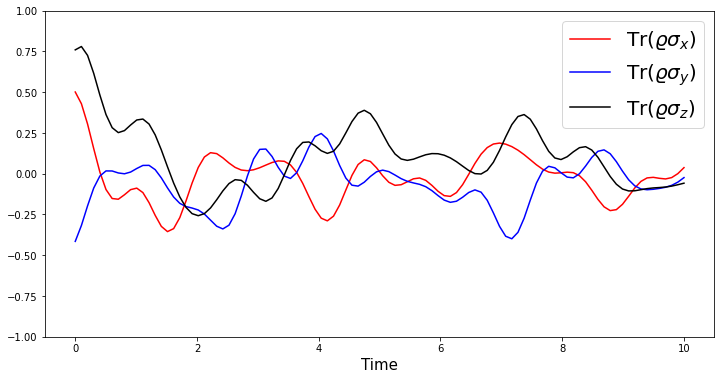

In [50]:
#------------------------Parameters------------------------#
dissipation_ampl = 0.02 # amplitude of dissipation
hamiltonian_ampl = 1  # amplitude of the hamiltonian part
time_step = 0.1  # time step size
total_time = 10  # total simulation time
number_of_lines = 10  # number of parallel experiments
size_of_mem = 3  # memory size
#----------------------------------------------------------#

# pauli matrices
sigma_x = tf.constant([[0, 1], [1, 0]], dtype=tf.complex128)
sigma_y = 1j * tf.constant([[0, -1], [1, 0]], dtype=tf.complex128)
sigma_z = tf.constant([[1, 0], [0, -1]], dtype=tf.complex128)

# all pauli matrices in one tensor
pauli = tf.concat([sigma_x[tf.newaxis],
                   sigma_y[tf.newaxis],
                   sigma_z[tf.newaxis]], axis=0)

# model initializing
model = FiniteEnv(2, size_of_mem)
model.set_rand_gen(dissipation_ampl, hamiltonian_ampl)

# random pure initial states
psi_re = tf.random.normal((number_of_lines, 2), dtype=tf.float64)
psi_im = tf.random.normal((number_of_lines, 2), dtype=tf.float64)
psi = tf.complex(psi_re, psi_im)
psi = psi / tf.linalg.norm(psi, axis=1, keepdims=True)
rho = psi[:, tf.newaxis] * tf.math.conj(psi)[..., tf.newaxis]

# dynamics simulation
dynamics = model.dynamics(total_time, time_step, rho)
X = tf.tensordot(dynamics, pauli, [[2, 3], [2, 1]])

# plotting some dynamics
time = tf.linspace(0, total_time, X.shape[1])
plt.figure(figsize=(12, 6))
plt.plot(time, X[0, :, 0], 'r')
plt.plot(time, X[0, :, 1], 'b')
plt.plot(time, X[0, :, 2], 'k')
plt.ylim(top=1, bottom=-1)
plt.xlabel('Time', fontsize=15)
plt.legend([r'${\rm Tr}(\varrho \sigma_x)$',
            r'${\rm Tr}(\varrho \sigma_y)$',
            r'${\rm Tr}(\varrho \sigma_z)$'], fontsize=20)